In [1]:
# Importing essential libraries for data manipulation (Pandas, NumPy) and visualization (Matplotlib, Seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset and displaying the first few rows to understand the structure and type of data available

df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
#Renaming the column 'Nacionality' to 'Nationality' and 'Target' to 'Student Status'

df.rename(columns = {'Nacionality':'Nationality', 'Target': 'Student Status'}, inplace = True)

In [4]:
df.shape # Reviewing the dataset's dimensions (total number of rows and columns)

(4424, 35)

In [5]:
df.info() #Displaying a summary of each column's data type and non-null values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
import dtale

# Launching D-Tale for the dataframe
d = dtale.show(df)
d.open_browser()

In [7]:
print("Number of missing values per column:\n", df.isnull().sum()) # Identifying missing values in the dataset

Number of missing values per column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International             

In [8]:
print("Number of duplicate values per column:\n", df.duplicated().sum()) # Identifying duplicate values in the dataset

Number of duplicate values per column:
 0


In [9]:
print(df["Student Status"].unique()) #Visualizing 'Student Status' non-numeric fields in the dataset

['Dropout' 'Graduate' 'Enrolled']


In [10]:
# Transforming 'Student Status' values into numerical format, making them interpretable by machine learning algorithms

df['Student Status'] = df['Student Status'].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [11]:
print(df["Student Status"].unique()) #Visualizing 'Student Status' numeric fields in the dataset

[0 2 1]


In [12]:
df.corr()['Student Status']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [13]:
# Calculating Spearman's Rank Correlation
spearman_corr = df.corr(method='spearman')['Student Status'].sort_values(ascending=False)

# Displaying the Spearman's Rank Correlation
print("Spearman's Rank Correlation with Student Status:")
print(spearman_corr)

Spearman's Rank Correlation with Student Status:
Student Status                                    1.000000
Curricular units 2nd sem (approved)               0.654049
Curricular units 1st sem (approved)               0.594194
Curricular units 2nd sem (grade)                  0.559820
Curricular units 1st sem (grade)                  0.497341
Tuition fees up to date                           0.400283
Scholarship holder                                0.301103
Curricular units 2nd sem (enrolled)               0.241456
Curricular units 1st sem (enrolled)               0.230576
Displaced                                         0.113241
Application order                                 0.102185
Daytime/evening attendance                        0.073066
GDP                                               0.053497
Curricular units 2nd sem (credited)               0.035004
Mother's occupation                               0.032700
Father's occupation                               0.032265
Curricu

In [14]:
# Removing unnecessary columns that won't contribute to the analysis or model building
df = df.drop(columns=['Nationality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation', 
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)
df.head()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Student Status
0,1,8,5,1,1,1,0,1,1,0,...,0,0.000000,0,0,0,0,0,0.000000,0,0
1,1,6,1,1,1,1,0,0,1,0,...,6,14.000000,0,0,6,6,6,13.666667,0,2
2,1,1,5,1,1,1,0,0,1,0,...,0,0.000000,0,0,6,0,0,0.000000,0,0
3,1,8,2,1,1,1,0,1,0,0,...,6,13.428571,0,0,6,10,5,12.400000,0,2
4,2,12,1,0,1,0,0,1,0,0,...,5,12.333333,0,0,6,6,6,13.000000,0,2


In [15]:
# Creating interaction features for academic performance
df['Interaction_CU_1st_2nd_Approved'] = df['Curricular units 1st sem (approved)'] * df['Curricular units 2nd sem (approved)']
df['Interaction_CU_1st_2nd_Grade'] = df['Curricular units 1st sem (grade)'] * df['Curricular units 2nd sem (grade)']

# Creating aggregated features
df['Total_CU_Approved'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']
df['Total_CU_Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Dropping the original features to reduce multi-collinearity
columns_to_drop = ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',]
df.drop(columns_to_drop, axis=1, inplace=True)

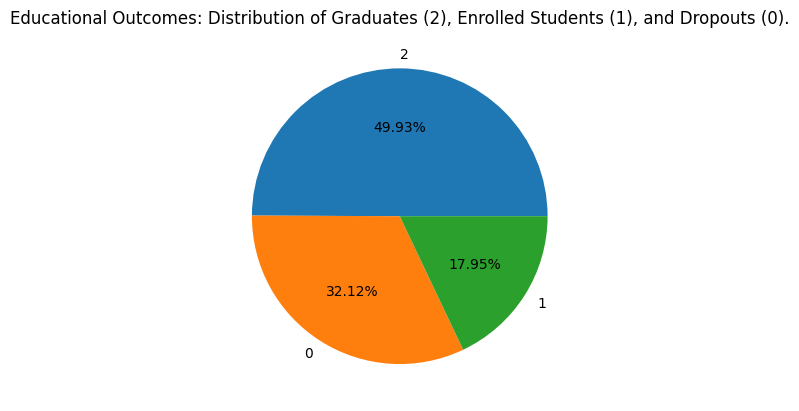

In [16]:
# Visualizing the distribution of Graduates vs. Dropouts vs. Enrolled to understand the performance baseline

categories_counts = df['Student Status'].value_counts()
plt.pie(categories_counts.values, labels=categories_counts.index, autopct='%1.2f%%')

plt.title('Educational Outcomes: Distribution of Graduates (2), Enrolled Students (1), and Dropouts (0).')
plt.show()

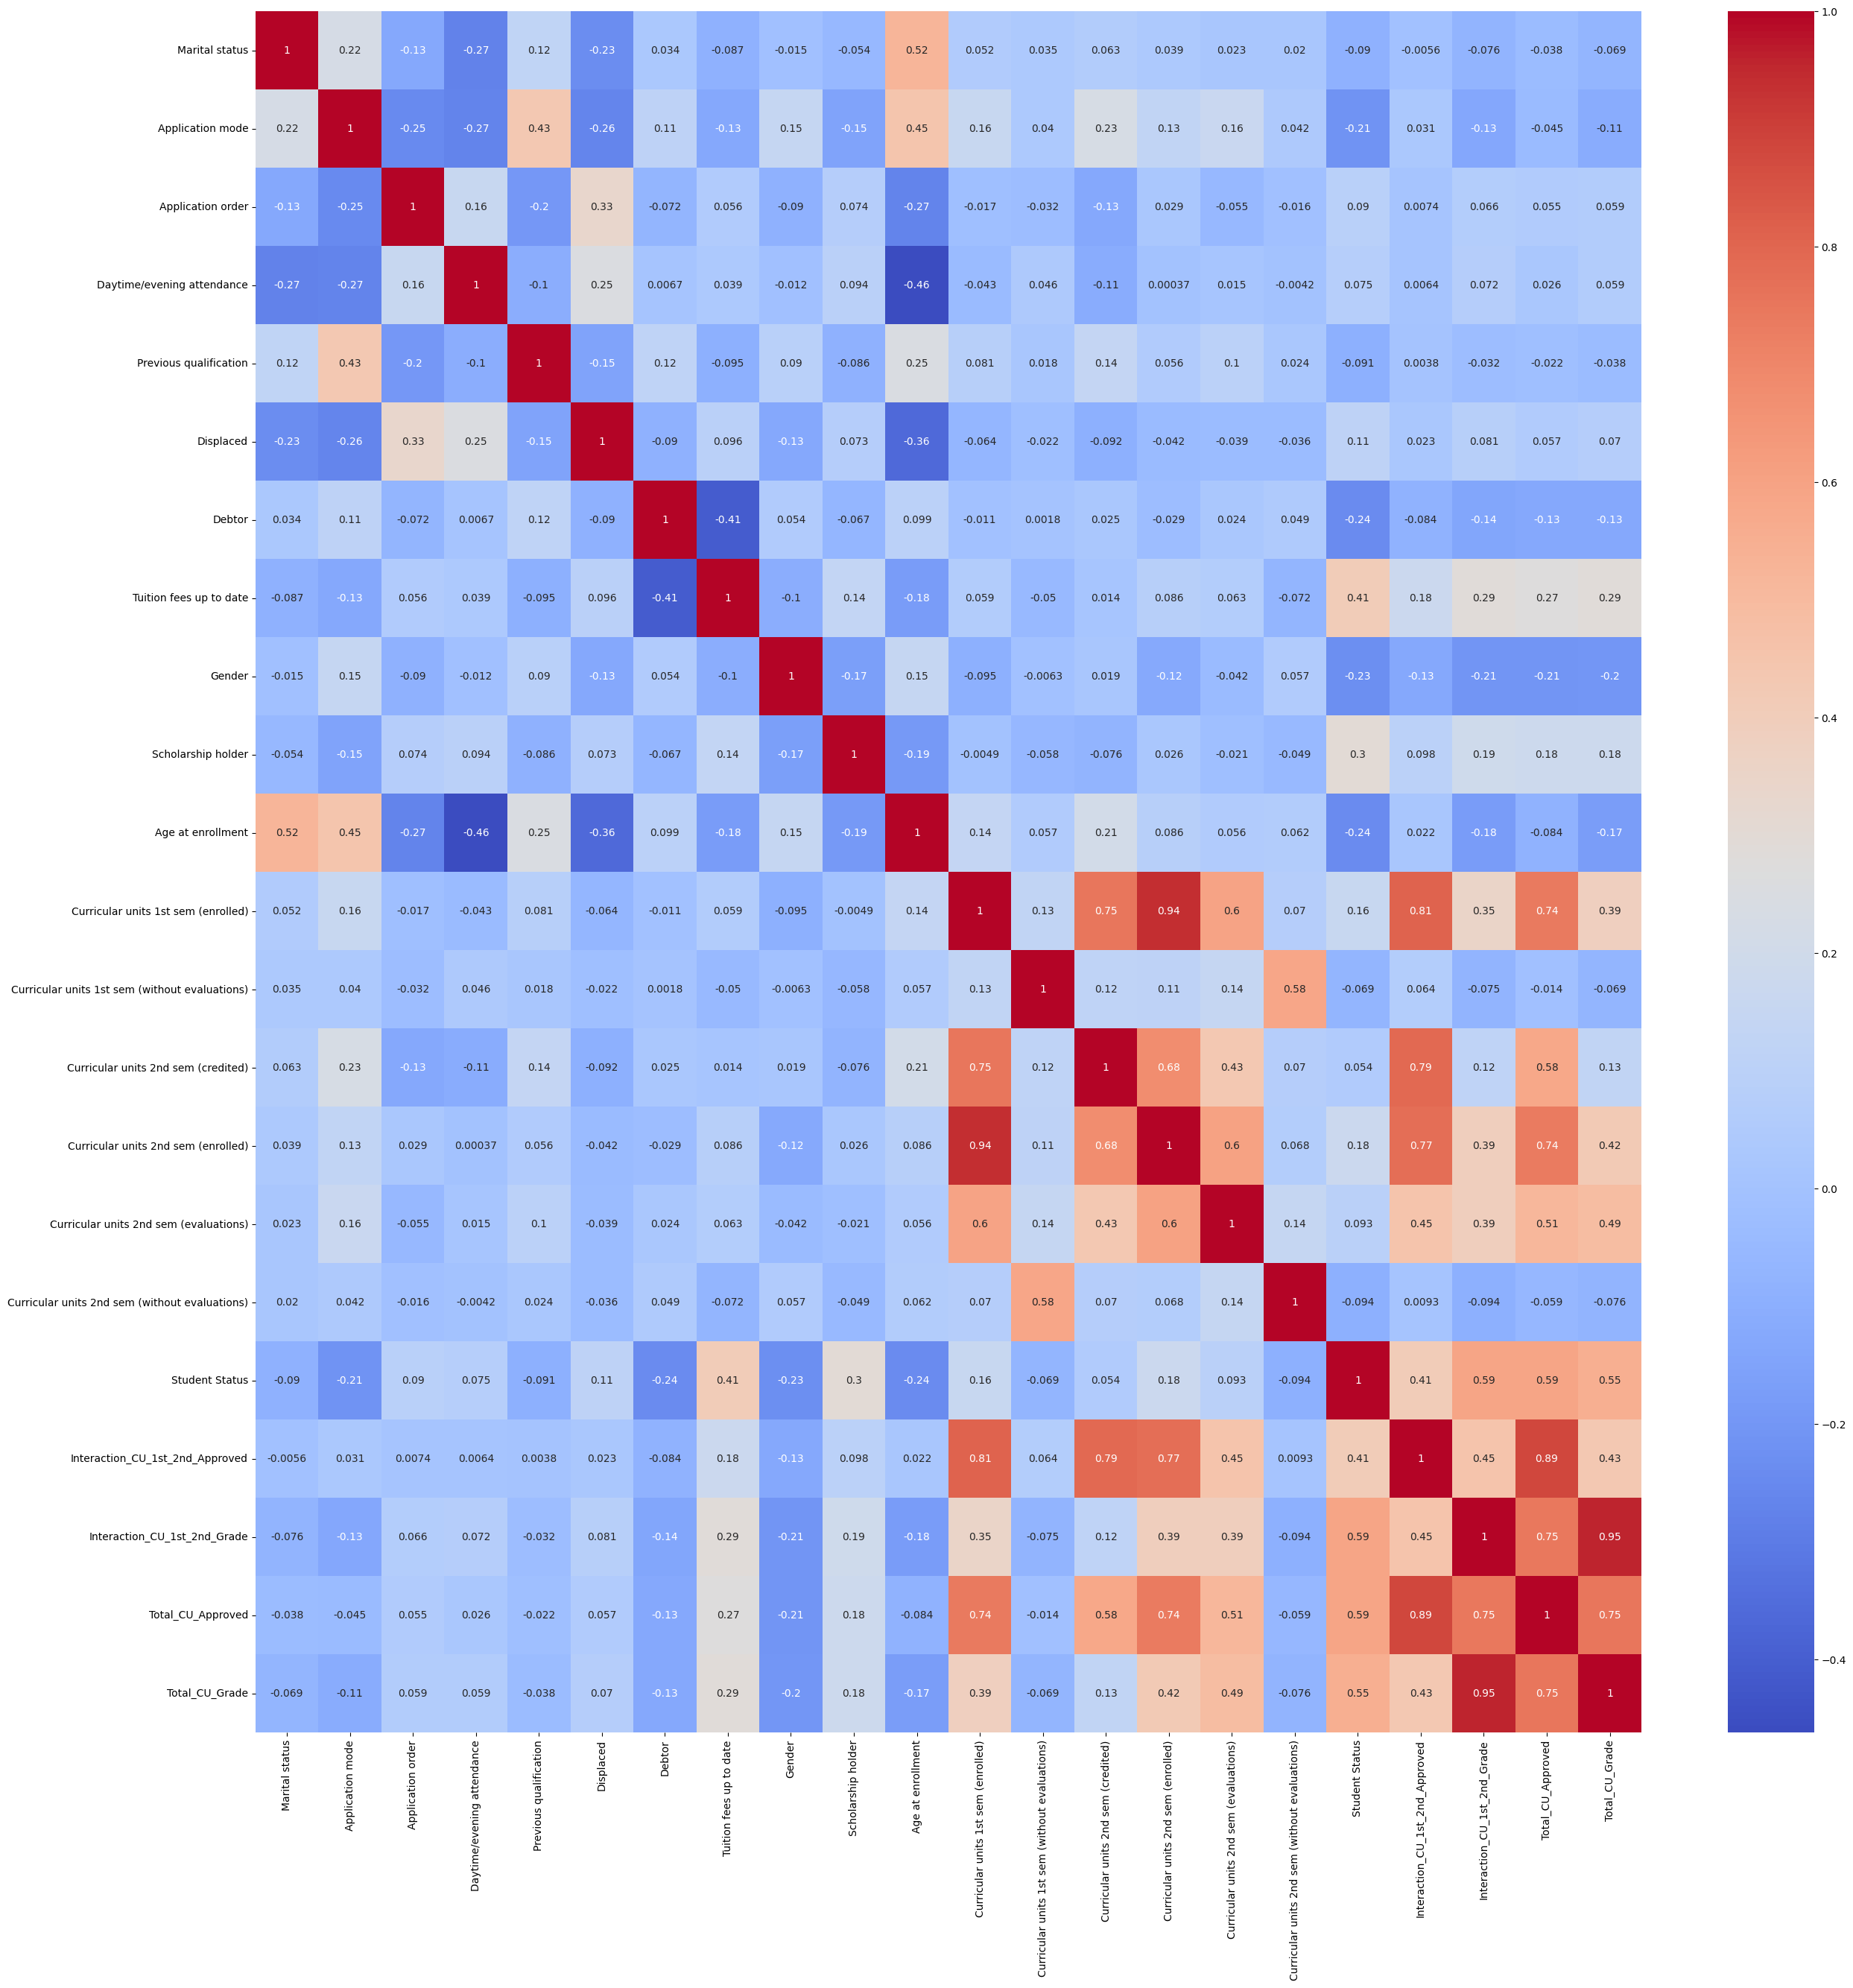

In [17]:
# Analyzing the correlation between various features with a heatmap to identify potential predictors for Student Status

plt.figure(figsize=(30,30))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

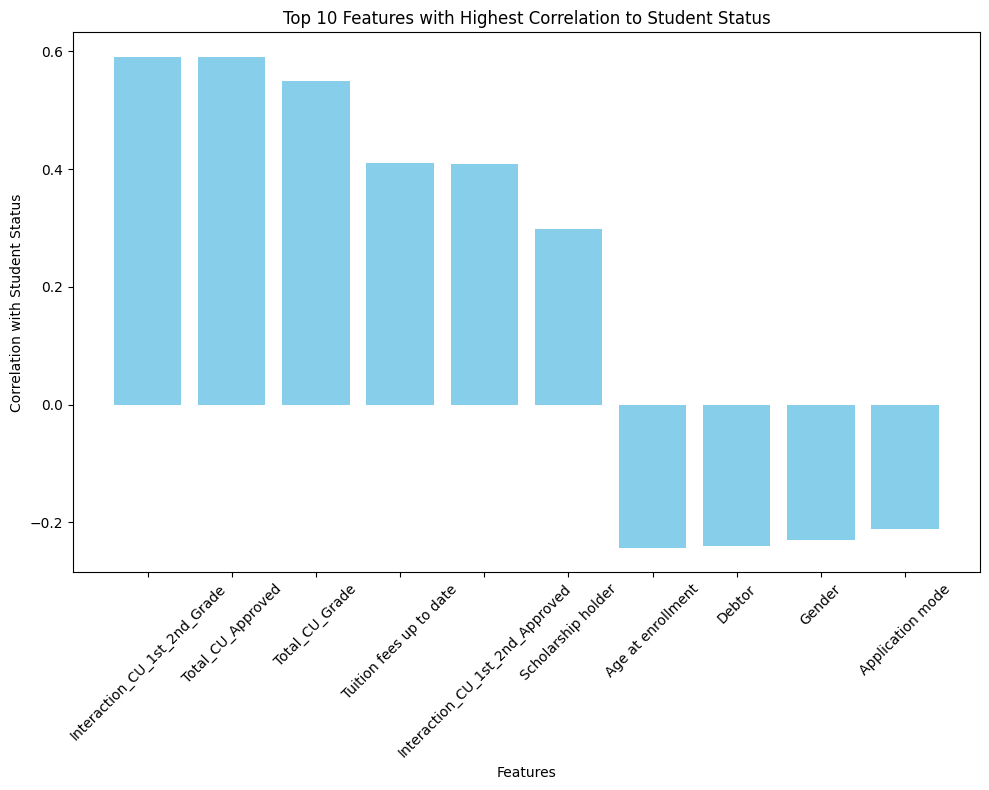

In [18]:
# Recalculating correlations to ensure consistency
correlations = df.corr()['Student Status'].drop('Student Status')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

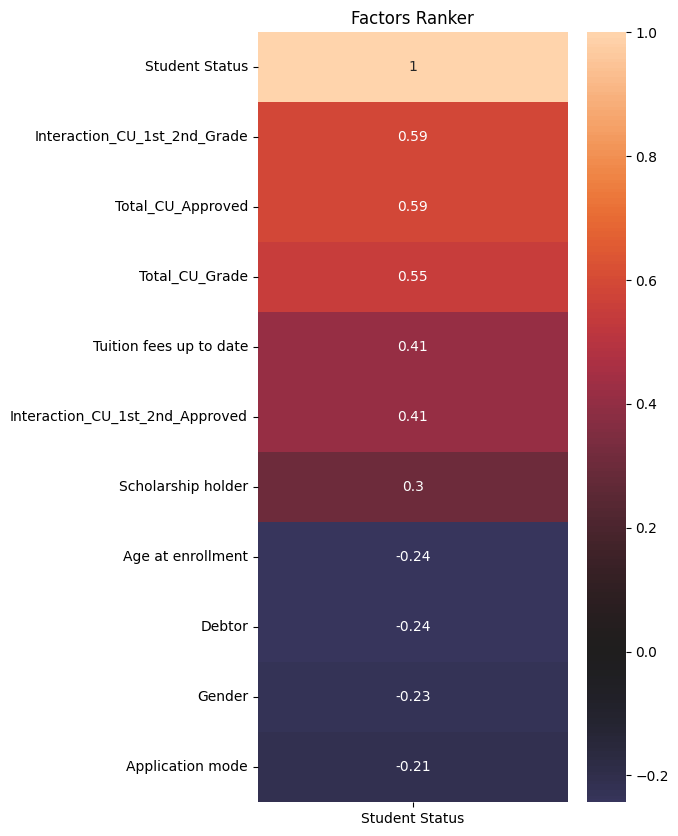

In [19]:
# Creating a new DataFrame with only the top 10 features and 'Student Status'
top_10_df = df[top_10_features.to_list() + ['Student Status']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Student Status']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Student Status', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

2025-02-04 17:20:49,843 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:20:49,856 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


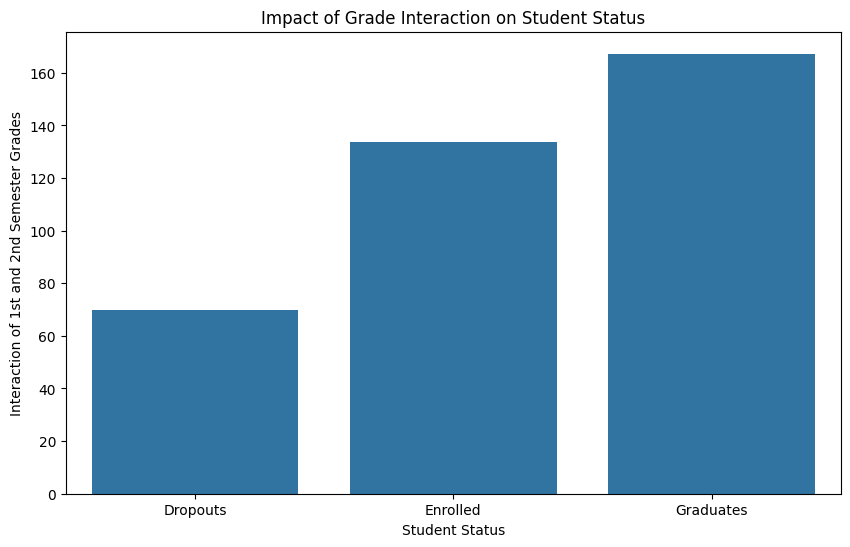

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Status', y='Interaction_CU_1st_2nd_Grade', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Student Status')
plt.show()

2025-02-04 17:20:49,978 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:20:49,985 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


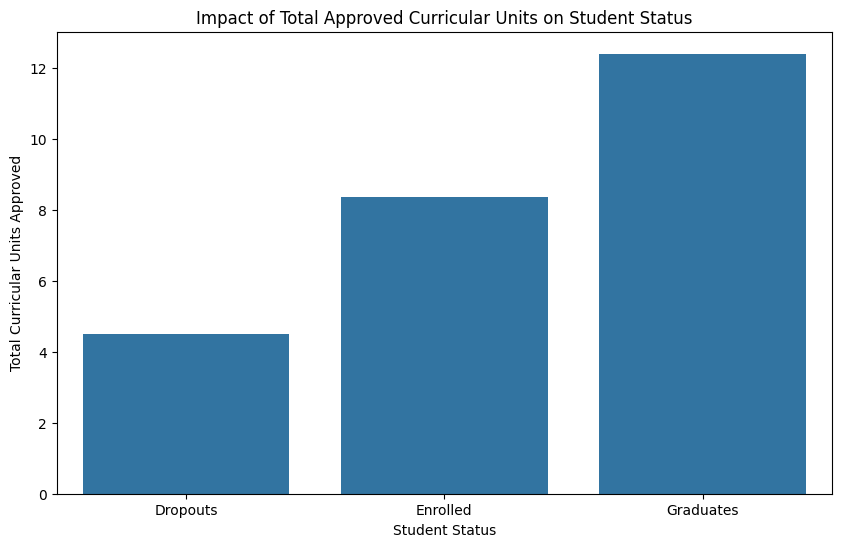

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Status', y='Total_CU_Approved', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Total Curricular Units Approved')
plt.title('Impact of Total Approved Curricular Units on Student Status')
plt.show()

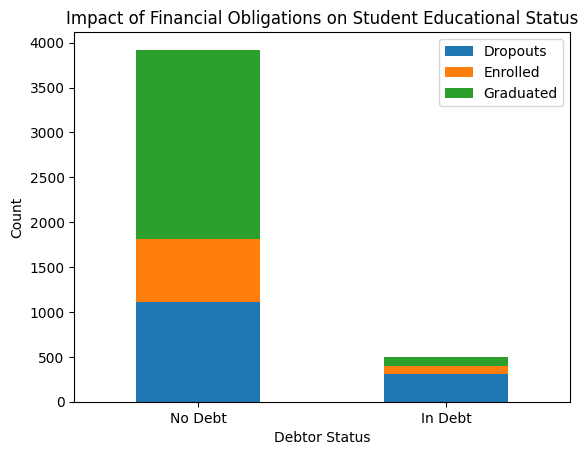

In [22]:
# Mapping Student Status numerical labels to descriptive labels for the legend
student_status_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}

# Mapping numerical labels to descriptive labels for Debtor status
debtor_status_labels = {0: 'No Debt', 1: 'In Debt'}

# Visualizing the impact of student debt on educational status
grouped = df.groupby(['Debtor', 'Student Status']).size().unstack()
grouped.rename(index=debtor_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Debtor Status')
plt.ylabel('Count')
plt.title('Impact of Financial Obligations on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

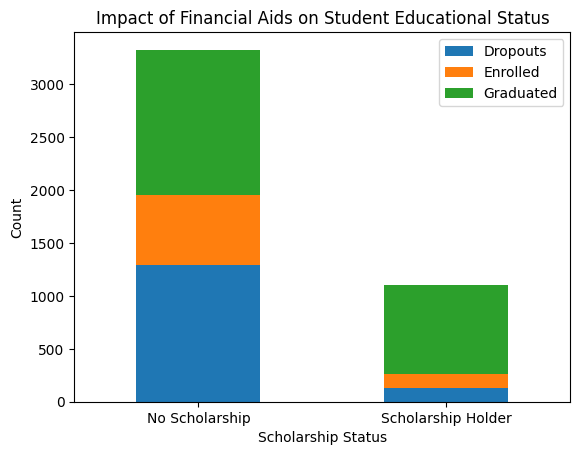

In [23]:
# Mapping numerical labels to descriptive labels for Scholarship status
scholarship_status_labels = {0: 'No Scholarship', 1: 'Scholarship Holder'}

# Visualizing the impact of scholarships on educational status
grouped = df.groupby(['Scholarship holder', 'Student Status']).size().unstack()
grouped.rename(index=scholarship_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Scholarship Status')
plt.ylabel('Count')
plt.title('Impact of Financial Aids on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

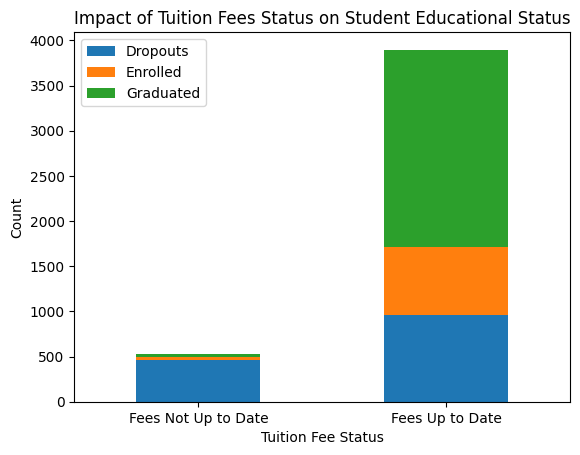

In [24]:
# Mapping numerical labels to descriptive labels for Tuition Fee status
tuition_fee_status_labels = {0: 'Fees Not Up to Date', 1: 'Fees Up to Date'}

# Visualizing the impact of tuition fees status on educational outcomes
grouped = df.groupby(['Tuition fees up to date', 'Student Status']).size().unstack()
grouped.rename(index=tuition_fee_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Tuition Fee Status')
plt.ylabel('Count')
plt.title('Impact of Tuition Fees Status on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

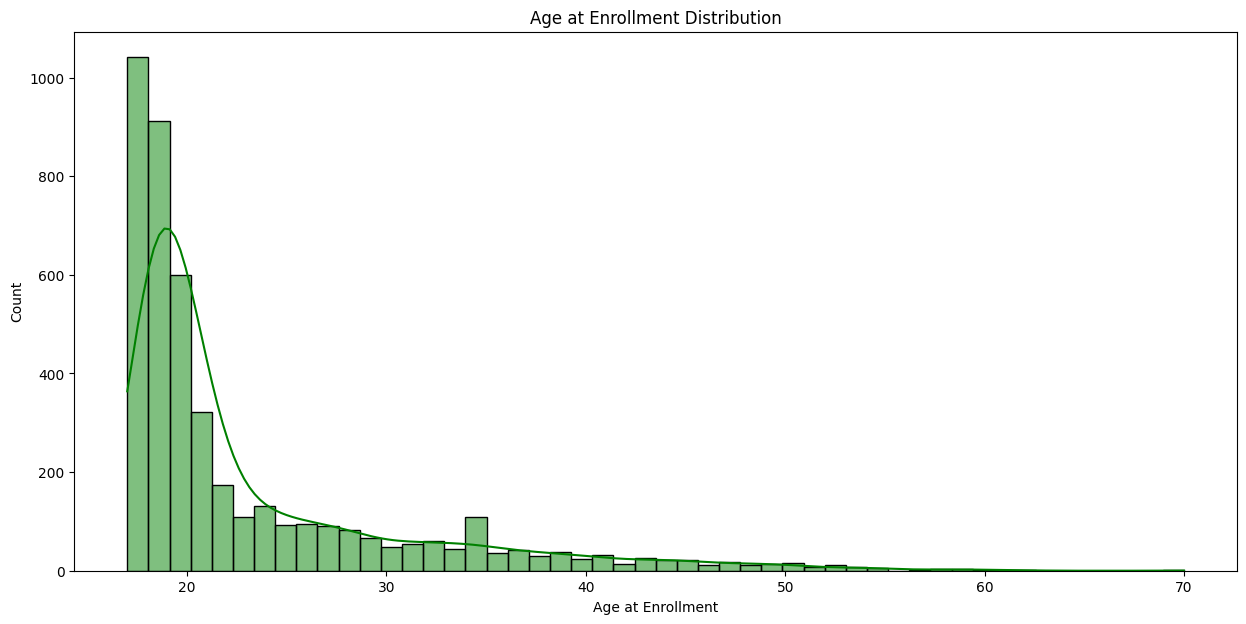

In [25]:
# Converting inf to NaN in the 'Age at enrollment' column
df['Age at enrollment'] = df['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

# Ignoring FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15, 7))
ax = sns.histplot(df['Age at enrollment'], bins=50, color='g', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()

2025-02-04 17:20:50,754 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:20:50,762 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


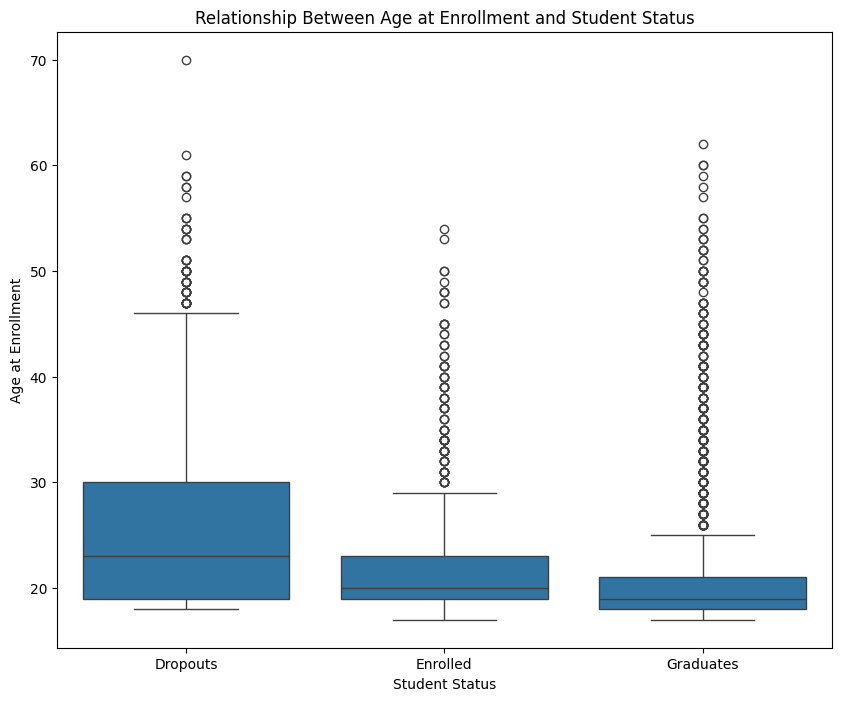

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Student Status', y='Age at enrollment', data=df)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Age at Enrollment')
plt.title('Relationship Between Age at Enrollment and Student Status')
plt.show()

2025-02-04 17:20:50,898 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-04 17:20:50,903 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


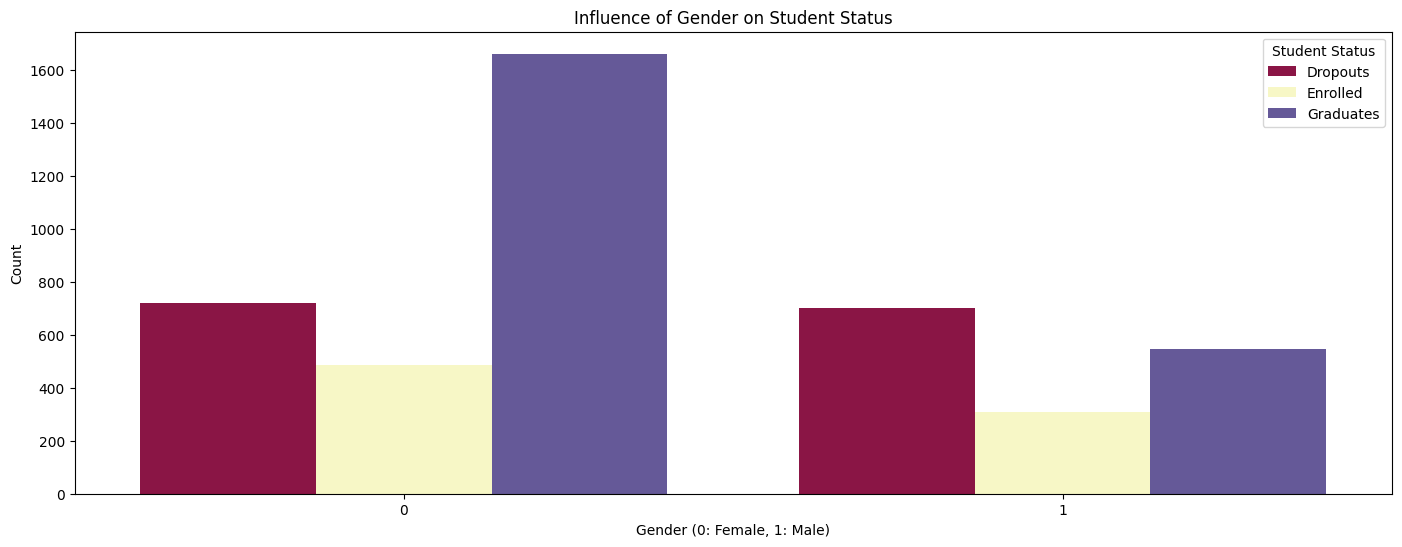

In [27]:
plt.figure(figsize=(17, 6))
sns.countplot(x='Gender', hue='Student Status', data=df, palette='Spectral')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Student Status', labels=['Dropouts', 'Enrolled', 'Graduates'])
plt.title('Influence of Gender on Student Status')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

# Preparing the data: Separating features and target label
X = df.drop('Student Status', axis=1)
y = df['Student Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

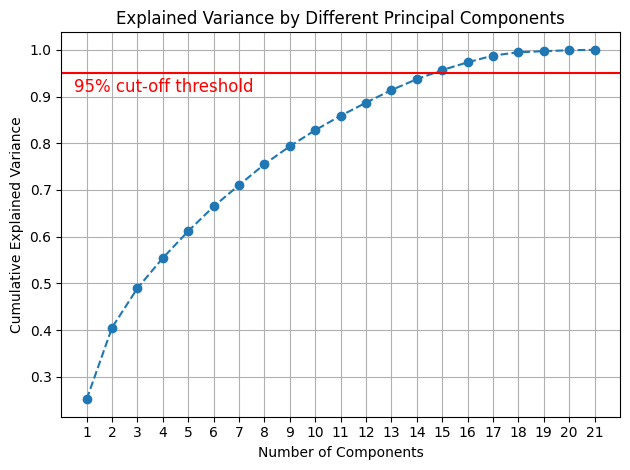

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fitting PCA on the training
pca = PCA().fit(X_train_scaled)

# Visualizing the cumulative explained variance to determine the number of components needed
plt.figure()
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Drawing a horizontal line at 95% cumulative explained variance
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.91, '95% cut-off threshold', color = 'red', fontsize=12)

plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))

plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import learning_curve

# Configuring different machine learning models with hyperparameters and pipelines
models_config = {
    'Gradient Boosting': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 150, 200],
            'model__learning_rate': [0.01, 0.05],
            'model__max_depth': [2, 3, 4],
            'model__subsample': [0.5, 0.75, 1.0],
            'model__validation_fraction': [0.1, 0.2],
            'model__n_iter_no_change': [10, 20, 30],
            'model__tol': [1e-4],
        }
    },
    'Random Forest': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 125],
            'model__max_depth': [3, 4],
            'model__min_samples_split': [4, 6],
            'model__min_samples_leaf': [2, 3],
            'model__max_features': ['log2'],
        }
    },
    'Logistic Regression': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': [0.005, 0.01, 0.05],
            'model__penalty': ['l1', 'l2'],
            'model__solver': ['liblinear'],
        }
    },
    'SVM': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.5, 2),
            'model__kernel': ['rbf', 'linear'],
        }
    },
    'KNN': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': randint(8, 14),
            'model__weights': ['uniform'],
        }
    }
}

# Configuring learning curves to identify if the models are underfitting or overfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Starting search for: Gradient Boosting
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Gradient Boosting: 0.7101
Training Score for Gradient Boosting: 0.7550
Search completed for Gradient Boosting. Time taken: 0:03:20
Best parameters for Gradient Boosting: {'model__validation_fraction': 0.2, 'model__tol': 0.0001, 'model__subsample': 1.0, 'model__n_iter_no_change': 20, 'model__n_estimators': 150, 'model__max_depth': 4, 'model__learning_rate': 0.01}


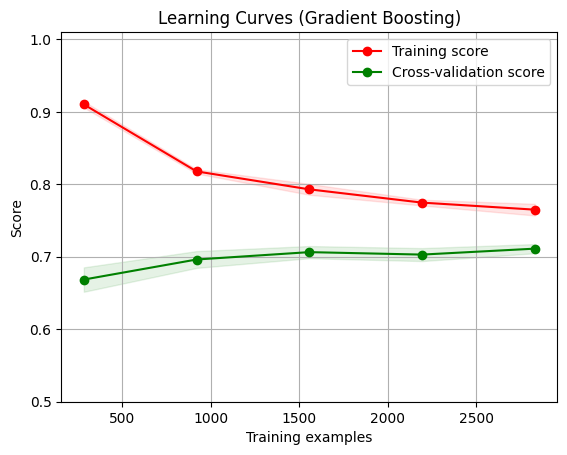

Starting search for: Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Random Forest: 0.6883
Training Score for Random Forest: 0.7296
Search completed for Random Forest. Time taken: 0:00:19
Best parameters for Random Forest: {'model__n_estimators': 125, 'model__min_samples_split': 6, 'model__min_samples_leaf': 2, 'model__max_features': 'log2', 'model__max_depth': 4}


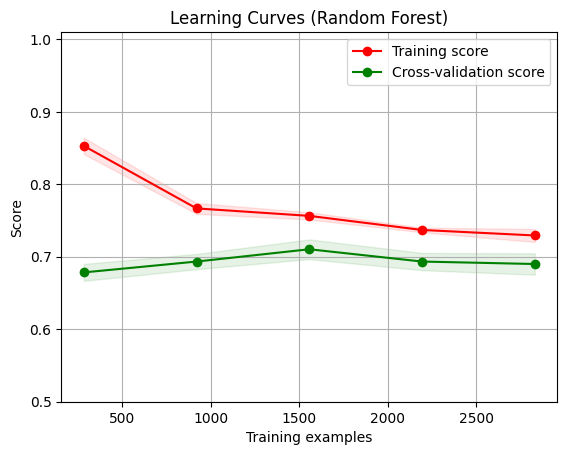

Starting search for: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Logistic Regression: 0.7352
Training Score for Logistic Regression: 0.7352
Search completed for Logistic Regression. Time taken: 0:00:01
Best parameters for Logistic Regression: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 0.05}


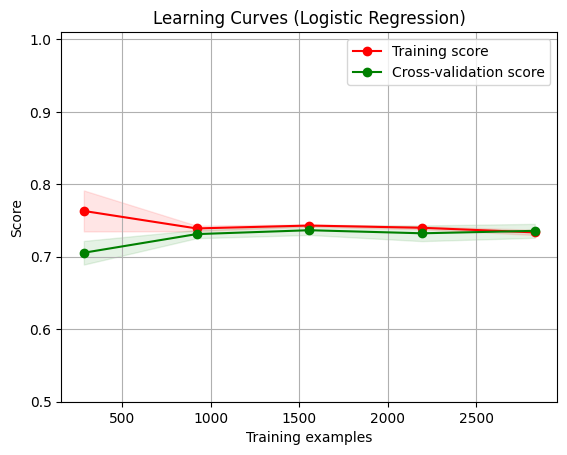

Starting search for: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for SVM: 0.7231
Training Score for SVM: 0.7265
Search completed for SVM. Time taken: 0:01:32
Best parameters for SVM: {'model__C': np.float64(0.6161672243363989), 'model__kernel': 'linear'}


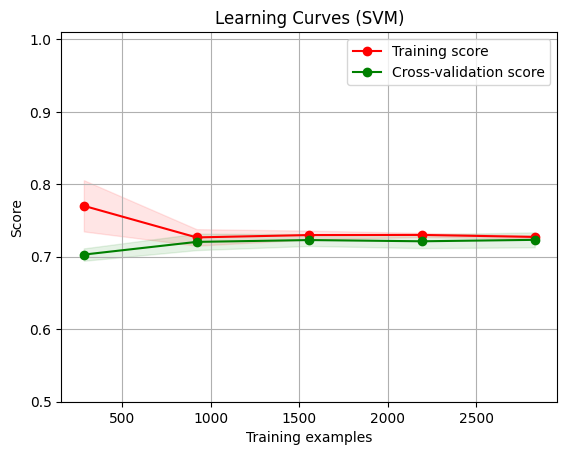

Starting search for: KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for KNN: 0.6536
Training Score for KNN: 0.7567
Search completed for KNN. Time taken: 0:00:03
Best parameters for KNN: {'model__n_neighbors': 9, 'model__weights': 'uniform'}


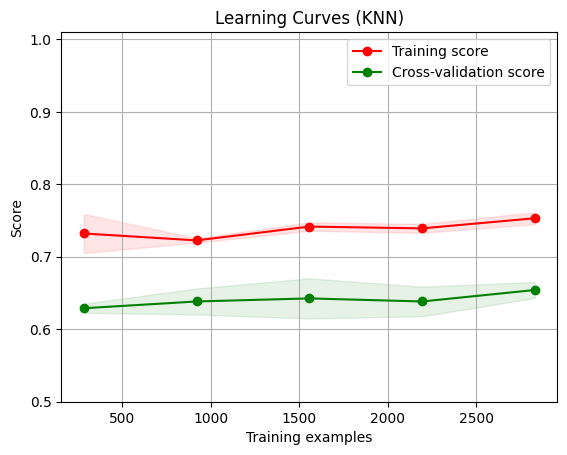

Total time for all model searches: 0:06:22


In [31]:
from sklearn.model_selection import RandomizedSearchCV
import time
from datetime import timedelta

best_models = {}
start_time = time.time()

# Performing RandomizedSearchCV
for name, config in models_config.items():
    print(f"Starting search for: {name}")
    search_start_time = time.time()
    
    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=6, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")
    
    # Comparing training set performance to the best CV score
    training_score = search.score(X_train, y_train)
    print(f"Training Score for {name}: {training_score:.4f}")
    
    elapsed_time = int(time.time() - search_start_time)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time))}")
    
    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")
    
    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=4)
    
overall_time = int(time.time() - start_time)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time))}")

In [32]:
from sklearn.ensemble import VotingClassifier

# Combining multiple models into an ensemble VotingClassifier to improve prediction accuracy
ensemble = VotingClassifier(estimators=[(name, model) for name, model in best_models.items()],
                            voting='soft') # 'soft' voting considers the confidence level of predictions

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Gradient Boosting',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=0.01,
                                                                          max_depth=4,
                                                                          n_estimators=150,
                                                                          n_iter_no_change=20,
                                                                          random_state=42,
                                                                          validation_fraction=0.2))])),
                             ('Random Forest',
                              Pipeline(ste...
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               SVC(C=np.float64(0.6161672243363989),
                                                   kernel='linear',
                                                   probability=True,
                                                   random_state=42))])),
                             ('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 voting='soft')

Ensemble model accuracy: 0.6972


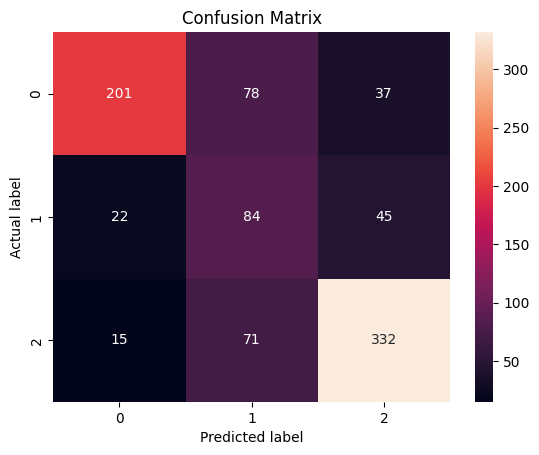

Test Accuracy: 0.6972
Training Accuracy: 0.7609

              precision    recall  f1-score   support

     Dropout       0.84      0.64      0.73       316
    Enrolled       0.36      0.56      0.44       151
    Graduate       0.80      0.79      0.80       418

    accuracy                           0.70       885
   macro avg       0.67      0.66      0.65       885
weighted avg       0.74      0.70      0.71       885



In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluating ensemble model performance on the test set
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model accuracy: {accuracy:.4f}")

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Overfitting Check
train_accuracy = ensemble.score(X_train, y_train)
test_accuracy = ensemble.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}\n")

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))

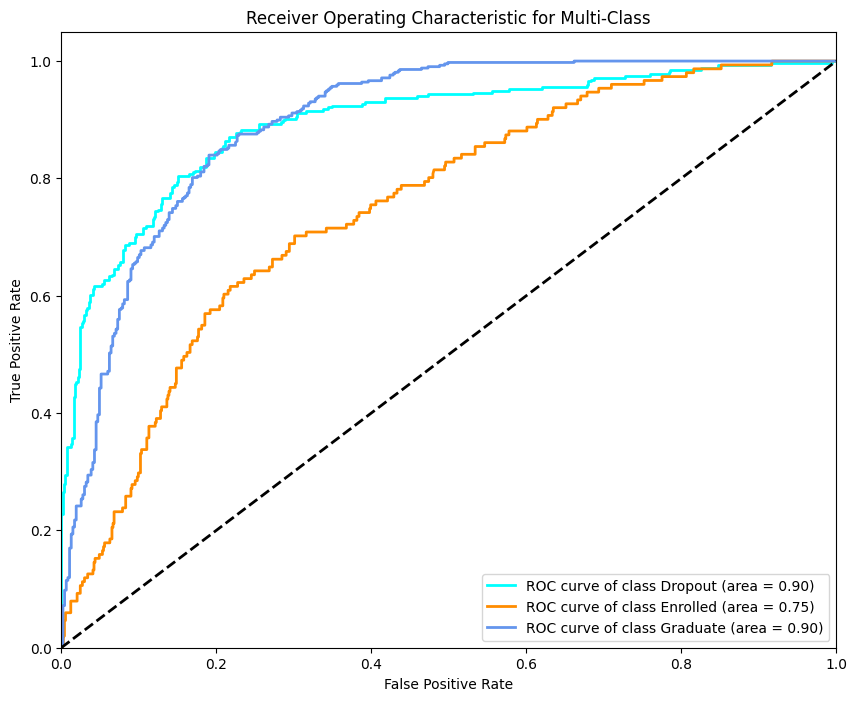

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

class_names = ['Dropout', 'Enrolled', 'Graduate']

# Binarizing the output labels for multi-class plotting
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Getting the probabilities for each class from your trained ensemble model
y_prob = ensemble.predict_proba(X_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves.
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

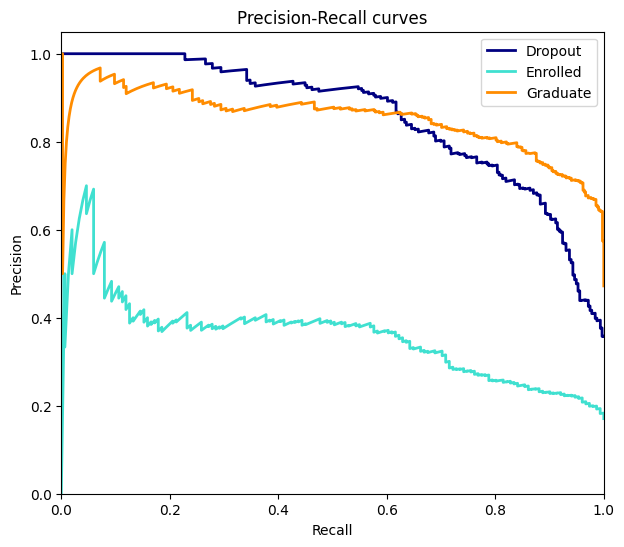

In [35]:
from sklearn.metrics import precision_recall_curve

# Calculating precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Plotting the precision-recall curves
plt.figure(figsize=(7, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{class_names[i]}'
             ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend(loc="upper right")
plt.show()

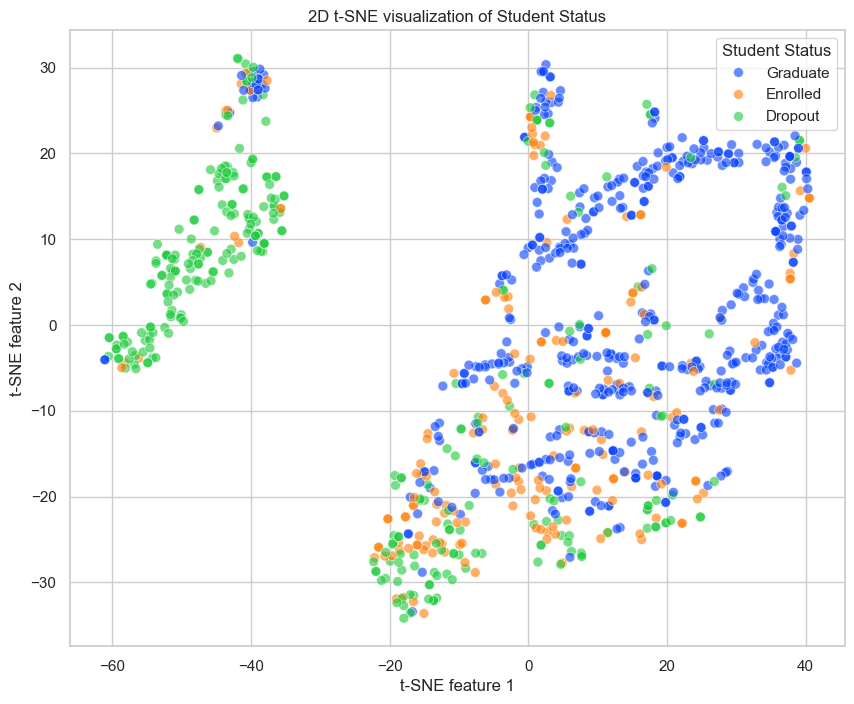

In [36]:
from sklearn.manifold import TSNE
from sklearn.utils import resample

# Subsampling the data
X_sampled, y_sampled = resample(X_train, y_train, n_samples=1000, stratify=y_train, random_state=42)

# Running t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_reduced = tsne.fit_transform(X_sampled)

# Predicting with the ensemble model
y_pred = ensemble.predict(X_sampled)

# Replacing numeric labels with string labels
label_names = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
y_sampled_named = y_sampled.map(label_names)  

# Adjusting the color palette to have clearer distinctions
palette = sns.color_palette("bright", len(label_names))

# Modifying the legend mapping for numeric to class names
legend_labels = {v: k for k, v in label_names.items()}

# 2D t-SNE Plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_sampled.map(label_names),
                palette=palette, alpha=0.6, s=50)

plt.title('2D t-SNE visualization of Student Status')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Student Status')
plt.show()

In [37]:
# Cloning the original DataFrame to preserve the initial dataset
df_rethinked = df.copy()

# Transforming 'Student Status' into a binary 'dropout' feature
df_rethinked['dropout'] = df_rethinked['Student Status'].map(lambda x: 1 if x == 0 else 0)

# Dropping the original 'Student Status' to avoid confusion
df_rethinked.drop(['Student Status'], axis=1, inplace=True)

# Preparing the dataset for training
X_new = df_rethinked.drop('dropout', axis=1)
y_new = df_rethinked['dropout']

# Splitting the dataset into training and testing sets for the binary classification
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [38]:
df_rethinked["dropout"].value_counts()

dropout
0    3003
1    1421
Name: count, dtype: int64

Starting search for: Gradient Boosting
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Gradient Boosting: 0.8435
Training Score for Gradient Boosting: 0.8627
Search completed for Gradient Boosting. Time taken: 0:02:27
Best parameters for Gradient Boosting: {'model__learning_rate': np.float64(0.047454011884736254), 'model__max_depth': 2, 'model__n_estimators': 114}


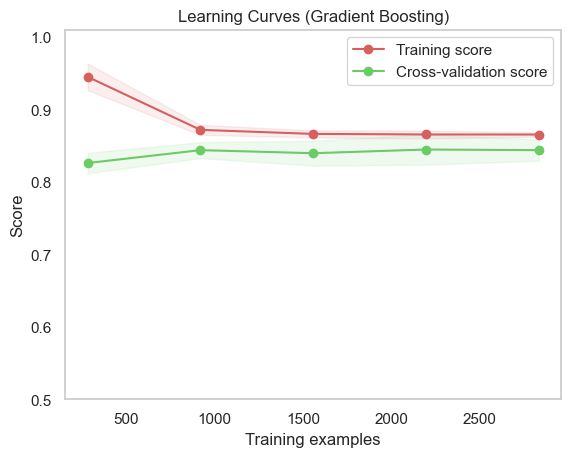

Starting search for: Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Random Forest: 0.8437
Training Score for Random Forest: 0.8680
Search completed for Random Forest. Time taken: 0:00:47
Best parameters for Random Forest: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3, 'model__n_estimators': 199}


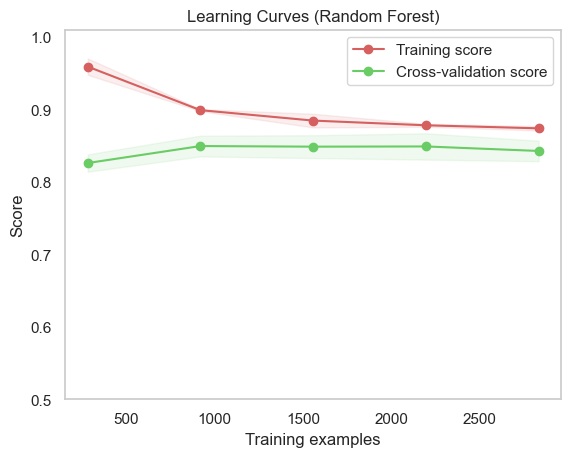

Starting search for: Logistic Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Logistic Regression: 0.8406
Training Score for Logistic Regression: 0.8446
Search completed for Logistic Regression. Time taken: 0:00:01
Best parameters for Logistic Regression: {'model__C': np.float64(0.07058449429580245)}


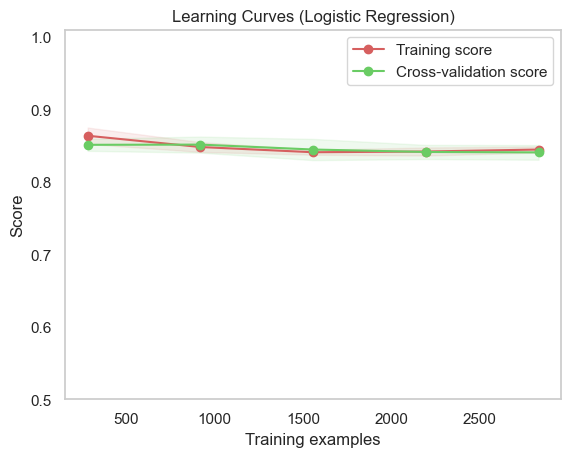

Starting search for: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for SVM: 0.8446
Training Score for SVM: 0.8805
Search completed for SVM. Time taken: 0:01:42
Best parameters for SVM: {'model__C': np.float64(1.749080237694725), 'model__kernel': 'rbf'}


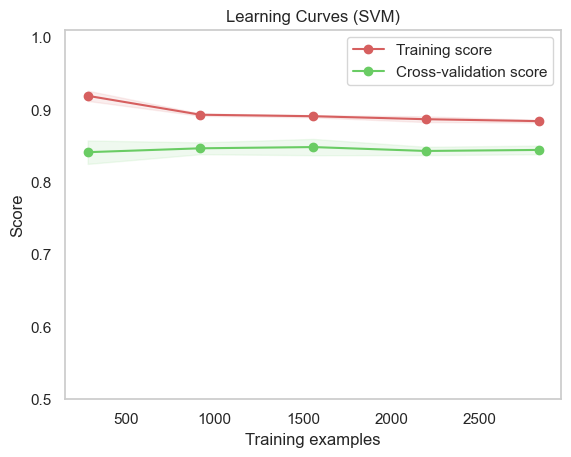

Starting search for: KNN
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for KNN: 0.8268
Training Score for KNN: 0.8556
Search completed for KNN. Time taken: 0:00:05
Best parameters for KNN: {'model__n_neighbors': 24, 'model__weights': 'uniform'}


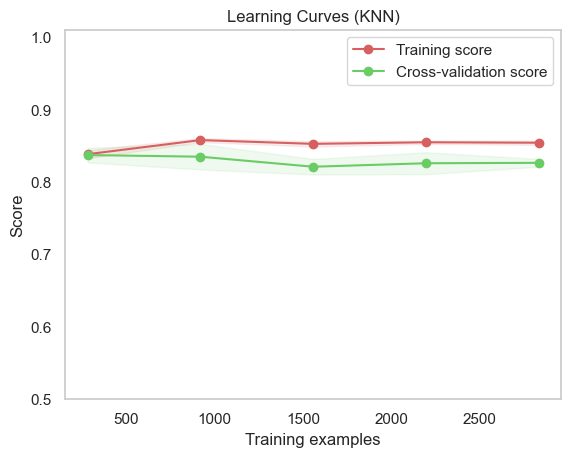

Total time for all model searches: 0:05:25


In [39]:
# Model configurations with hyperparameters
models_config_new = {
    'Gradient Boosting': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 150),
            'model__learning_rate': uniform(0.01, 0.1),
            'model__max_depth': randint(2, 4)
        }
    },
    'Random Forest': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 200),
            'model__max_depth': randint(3, 6),
            'model__min_samples_split': randint(3, 6),
            'model__min_samples_leaf': randint(2, 4)
        }
    },
    'Logistic Regression': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.05, 1)
        }
    },
    'SVM': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': uniform(1, 2),
            'model__kernel': ['rbf']
        }
    },
    'KNN': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': randint(20, 30),
            'model__weights': ['uniform', 'distance']
        }
    }
}

best_models_binary = {}
start_time_new = time.time()

# New RandomizedSearchCV
for name, config in models_config_new.items():
    print(f"Starting search for: {name}")
    search_start_time_new = time.time()
    
    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=12, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train_new, y_train_new)

    best_models_binary[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")
    
    # Comparing training set performance to the best CV score
    training_score = search.score(X_train_new, y_train_new)
    print(f"Training Score for {name}: {training_score:.4f}")
    
    elapsed_time_new = int(time.time() - search_start_time_new)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time_new))}")
    
    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")
    
    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train_new, y_train_new, ylim=(0.5, 1.01), cv=5, n_jobs=4)
    
overall_time_new = int(time.time() - start_time_new)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time_new))}")

In [40]:
from sklearn.ensemble import VotingClassifier

# Creating an ensemble of the best models
ensemble_binary = VotingClassifier(
    estimators=[(name, model) for name, model in best_models_binary.items()],
    voting='soft'
)
ensemble_binary.fit(X_train_new, y_train_new)

VotingClassifier(estimators=[('Gradient Boosting',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=np.float64(0.047454011884736254),
                                                                          max_depth=2,
                                                                          n_estimators=114,
                                                                          random_state=42))])),
                             ('Random Forest',
                              Pipeline(steps=[('scaler', StandardScaler()),...
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               SVC(C=np.float64(1.749080237694725),
                                                   probability=True,
                                                   random_state=42))])),
                             ('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=24))]))],
                 voting='soft')

Ensemble Model Accuracy: 0.8475


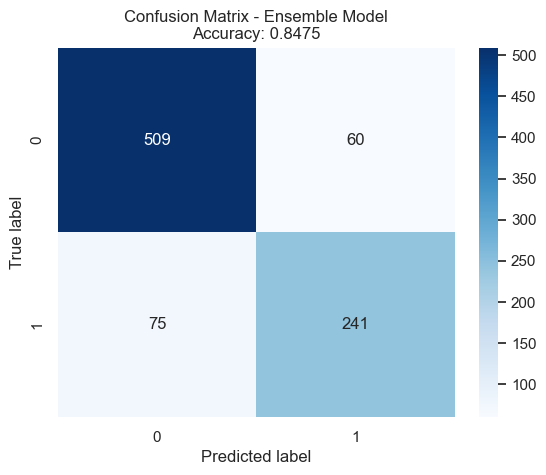

              precision    recall  f1-score   support

     Dropout       0.87      0.89      0.88       569
  No Dropout       0.80      0.76      0.78       316

    accuracy                           0.85       885
   macro avg       0.84      0.83      0.83       885
weighted avg       0.85      0.85      0.85       885



In [41]:
# Predictions
y_pred_binary = ensemble_binary.predict(X_test_new)

# Accuracy
accuracy_binary = accuracy_score(y_test_new, y_pred_binary)
print(f"Ensemble Model Accuracy: {accuracy_binary:.4f}")

# Confusion Matrix
conf_matrix_ensemble_binary = confusion_matrix(y_test_new, y_pred_binary)
sns.heatmap(conf_matrix_ensemble_binary, annot=True, fmt="d", cmap='Blues')
plt.title(f"Confusion Matrix - Ensemble Model\nAccuracy: {accuracy_binary:.4f}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Classification Report
print(classification_report(y_test_new, y_pred_binary, target_names=['Dropout', 'No Dropout']))

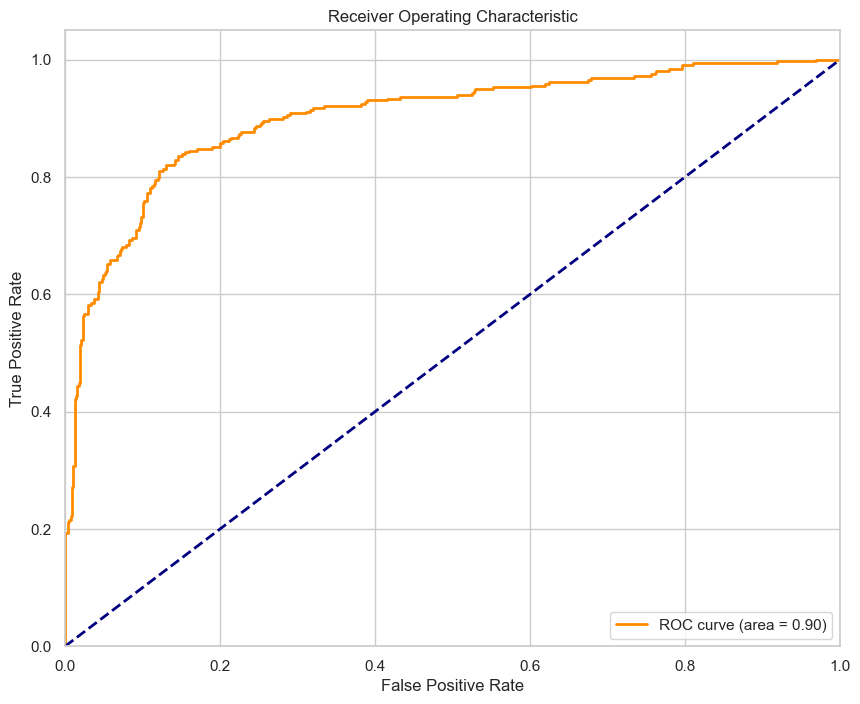

In [42]:
# ROC AUC Curve
y_prob_binary = ensemble_binary.predict_proba(X_test_new)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_new, y_prob_binary)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

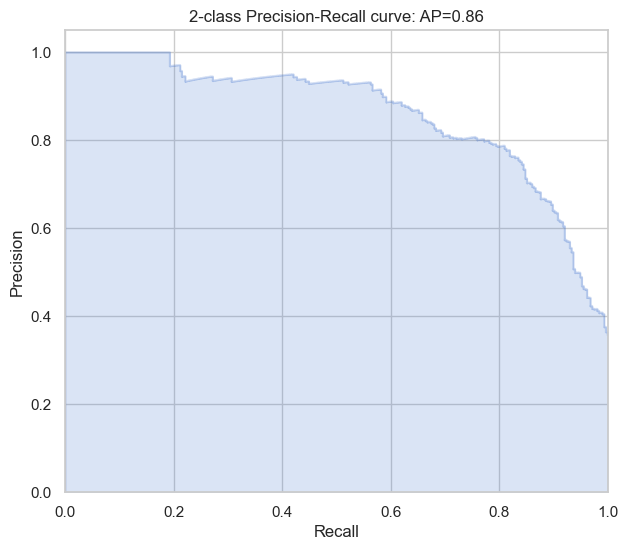

In [43]:
from sklearn.metrics import average_precision_score

# Precision-Recall Curve for binary classification
precision, recall, _ = precision_recall_curve(y_test_new, y_prob_binary)
average_precision = average_precision_score(y_test_new, y_prob_binary)

plt.figure(figsize=(7, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

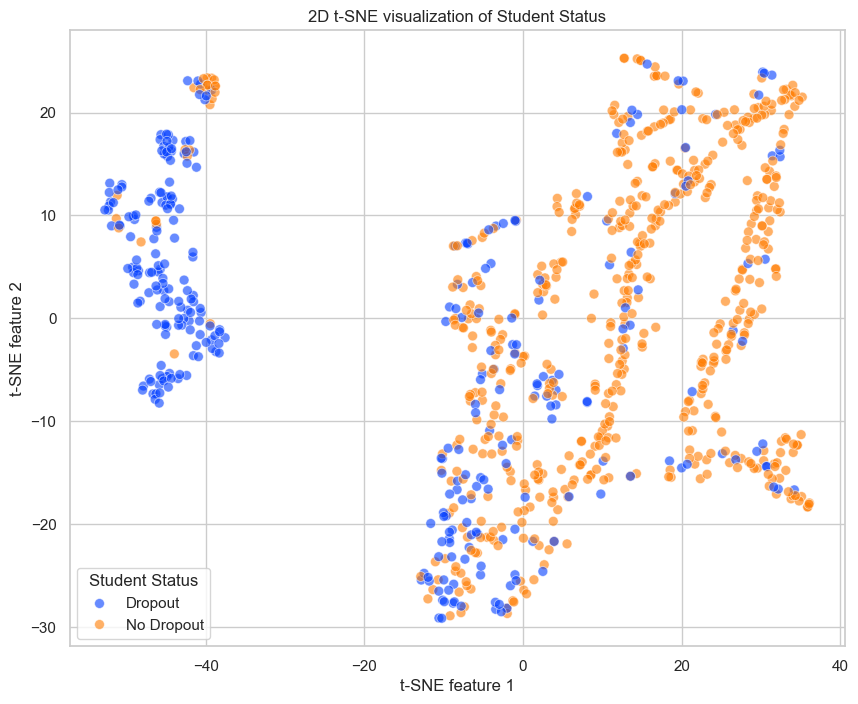

In [44]:
# 2D t-SNE Visualization for binary classification
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_test_new)

# Replacing numeric labels with string labels
label_names = {0: 'No Dropout', 1: 'Dropout'}
y_test_named = y_test_new.map(label_names)  

# Adjusting the color palette to have clear distinctions
palette = sns.color_palette("bright", len(label_names))

# Modifying the legend mapping for numeric to class names
legend_labels = {v: k for k, v in label_names.items()}

# 2D t-SNE Plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_test_named, palette=palette, alpha=0.6, s=50)
plt.title('2D t-SNE visualization of Student Status')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Student Status', loc='best')
plt.show()

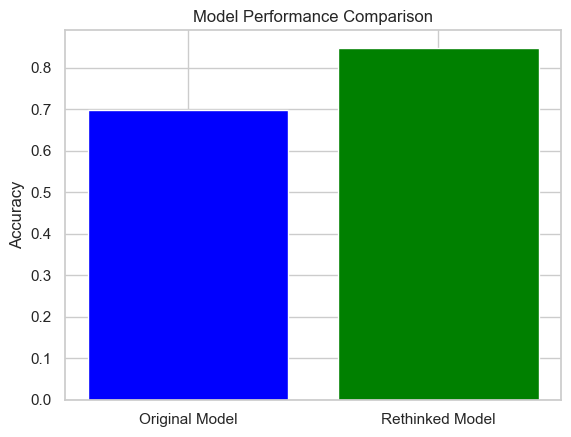

In [45]:
# Visualization setup
labels = ['Original Model', 'Rethinked Model']
accuracy_scores = [accuracy, accuracy_binary]

# Creating the plot
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()

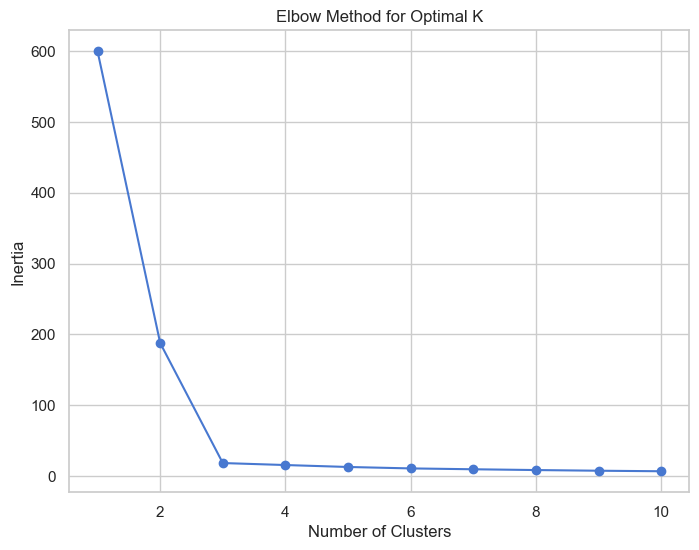

K-Means: Silhouette Score = 0.8482, Davies-Bouldin Score = 0.2107


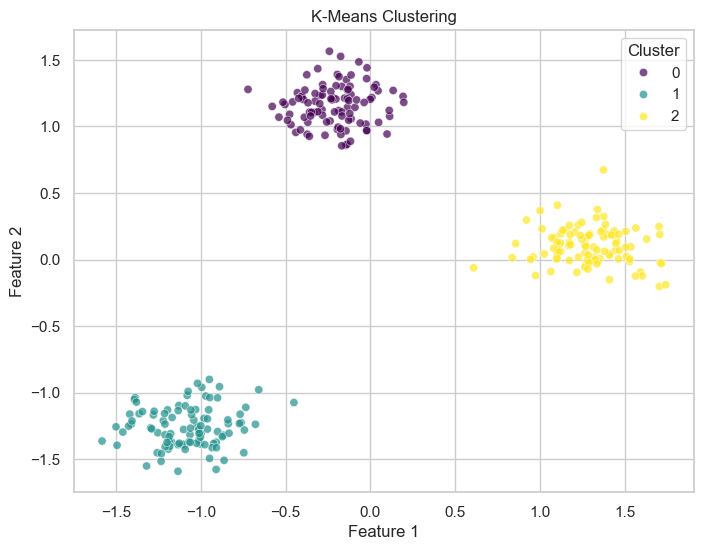

Hierarchical Clustering: Silhouette Score = 0.8482, Davies-Bouldin Score = 0.2107


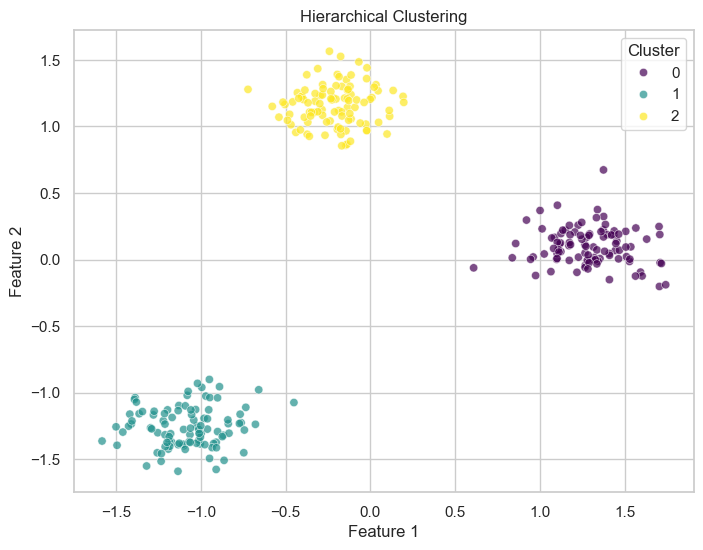

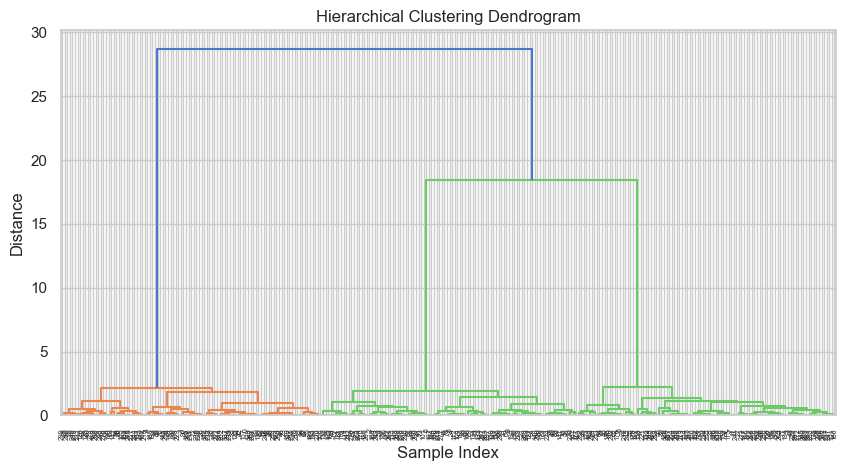

DBSCAN: Silhouette Score = 0.8482, Davies-Bouldin Score = 0.2107


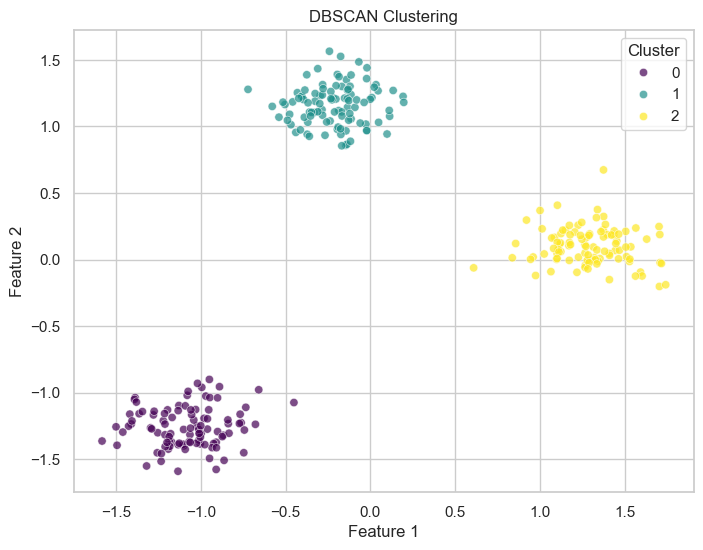

GMM: Silhouette Score = 0.8482, Davies-Bouldin Score = 0.2107


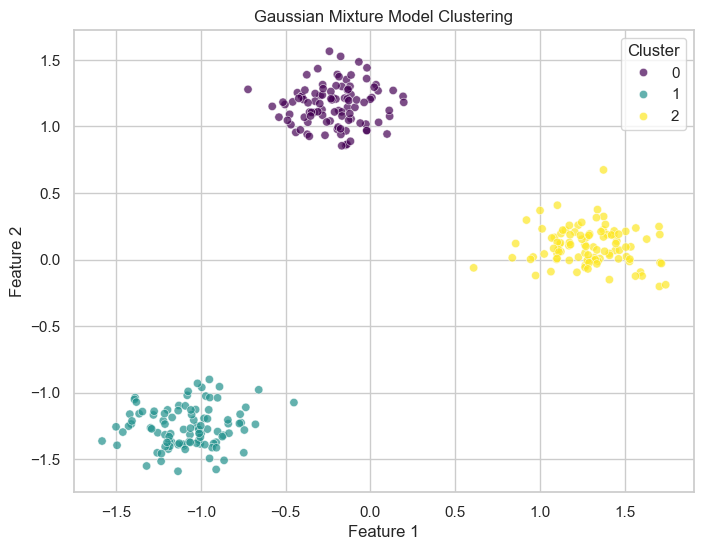

2025-02-04 18:20:51,451 - INFO     - Executing shutdown due to inactivity...
2025-02-04 18:20:55,659 - INFO     - Executing shutdown...
2025-02-04 18:20:55,666 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Cluster')
    plt.show()

# Elbow Method to determine optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)
print(f"K-Means: Silhouette Score = {kmeans_silhouette:.4f}, Davies-Bouldin Score = {kmeans_davies_bouldin:.4f}")
plot_clusters(X_scaled, kmeans_labels, "K-Means Clustering")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X_scaled, hierarchical_labels)
print(f"Hierarchical Clustering: Silhouette Score = {hierarchical_silhouette:.4f}, Davies-Bouldin Score = {hierarchical_davies_bouldin:.4f}")
plot_clusters(X_scaled, hierarchical_labels, "Hierarchical Clustering")

# Plot Dendrogram
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
dbscan_davies_bouldin = davies_bouldin_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN: Silhouette Score = {dbscan_silhouette:.4f}, Davies-Bouldin Score = {dbscan_davies_bouldin:.4f}")
plot_clusters(X_scaled, dbscan_labels, "DBSCAN Clustering")

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)
print(f"GMM: Silhouette Score = {gmm_silhouette:.4f}, Davies-Bouldin Score = {gmm_davies_bouldin:.4f}")
plot_clusters(X_scaled, gmm_labels, "Gaussian Mixture Model Clustering")
